# Preliminary analysis

Let us figure out which all variables might be best included in further analysis. We are also interested in exploring the data to see how the variables are distributed.

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
transit = pd.read_csv("Data/transit_income.csv")
transit.drop('Unnamed: 0', axis=1, inplace=True)
transit.head()

,country,city,phase,start_year,end_year,rr,length,tunnelper,tunnel,elevated,...,anglo,real_cost_2021,cost_km_2021,country_name,Region,IncomeGroup,2021,rule_of_law,no_corruption,enforcement
0,TR,Istanbul,M4 Phase 3,2015,2022,0.0,7.5,1.000000,7.5,0.000,...,0.0,550.341886,73.378918,Turkiye,Europe & Central Asia,Upper middle income,9661.227734,0.42,0.46,0.41
1,CA,Vancouver,Broadway,2020,2025,0.0,5.7,0.877193,5.0,0.295,...,1.0,2565.240650,450.042219,Canada,North America,High income,52358.621640,0.80,0.82,0.80
2,CA,Toronto,Vaughan,2009,2017,0.0,8.6,1.000000,8.6,0.000,...,1.0,3014.952287,350.575847,Canada,North America,High income,52358.621640,0.80,0.82,0.80
3,CA,Toronto,Scarborough,2020,2030,0.0,7.8,1.000000,7.8,0.000,...,1.0,4985.450027,639.160260,Canada,North America,High income,52358.621640,0.80,0.82,0.80
4,CA,Toronto,Ontario,2020,2030,0.0,15.5,0.570000,8.8,5.760,...,1.0,7632.655004,492.429355,Canada,North America,High income,52358.621640,0.80,0.82,0.80


In [83]:
# Check for missing data
print("\nMissing values:\n")
print(transit.isnull().sum())


Missing values:

country                     0
city                        0
phase                       0
start_year                  0
end_year                    0
rr                          0
length                      0
tunnelper                   0
tunnel                      0
elevated                  352
atgrade                   354
stations                    0
platform_length_meters    429
anglo                       0
real_cost_2021              0
cost_km_2021                0
country_name                0
Region                      0
IncomeGroup                 0
2021                        0
rule_of_law                34
no_corruption              34
enforcement                34
dtype: int64


The following variables might need a reduction
'elevated', 'atgrade', 'platform_length_meters', 'rule_of_law', 'no_corruption', 'enforcement'
'real_cost_2021', 'anglo'

Let us look at each variable.
We can only cluster for indegers. 

## Correlations
 As far as possible, we will try to avoid variables with high degrees of correlation. 

/var/folders/cx/5hr478816plb9gd8v3v207d40000gn/T/ipykernel_17546/2519510622.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(transit[cols_to_plot].corr(), annot=True)


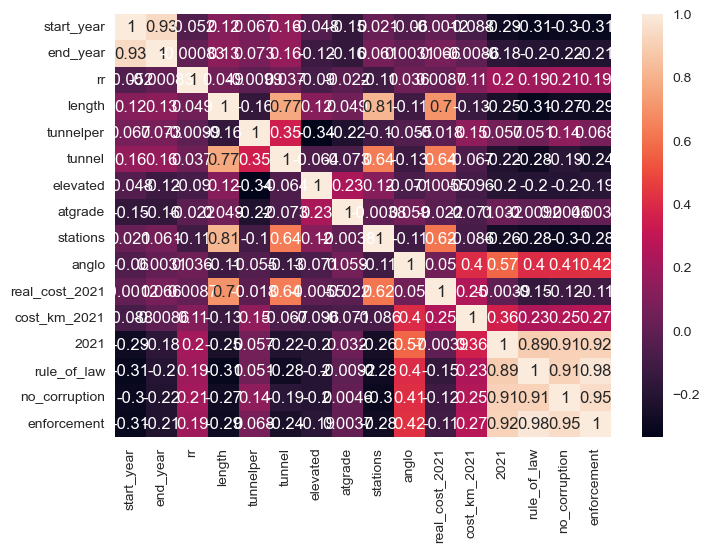

In [88]:
ax = sns.heatmap(transit[cols_to_plot].corr(), annot=True)

From the correlation heatmap, it is clear that some variables have high degree of correlation (above 0.7) We will want to avoid using length, stations, and real cost are correlated. Similary start and end years have high degree of correlation, so do the new variables we included - per capital income, rule of law, and related variables. 

/var/folders/cx/5hr478816plb9gd8v3v207d40000gn/T/ipykernel_17546/239989517.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(transit[cols_to_plot].corr())
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


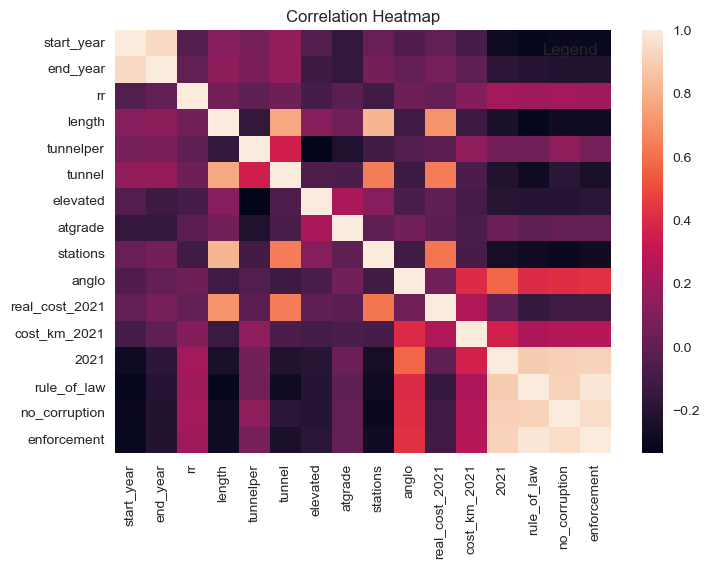

In [101]:
# neater plot for the report
ax = sns.heatmap(transit[cols_to_plot].corr())
plt.title("Correlation Heatmap")
# Add legend with custom elements
ax.legend(title="Legend")
plt.savefig("Figures/correlationheatmap.png", dpi=300)

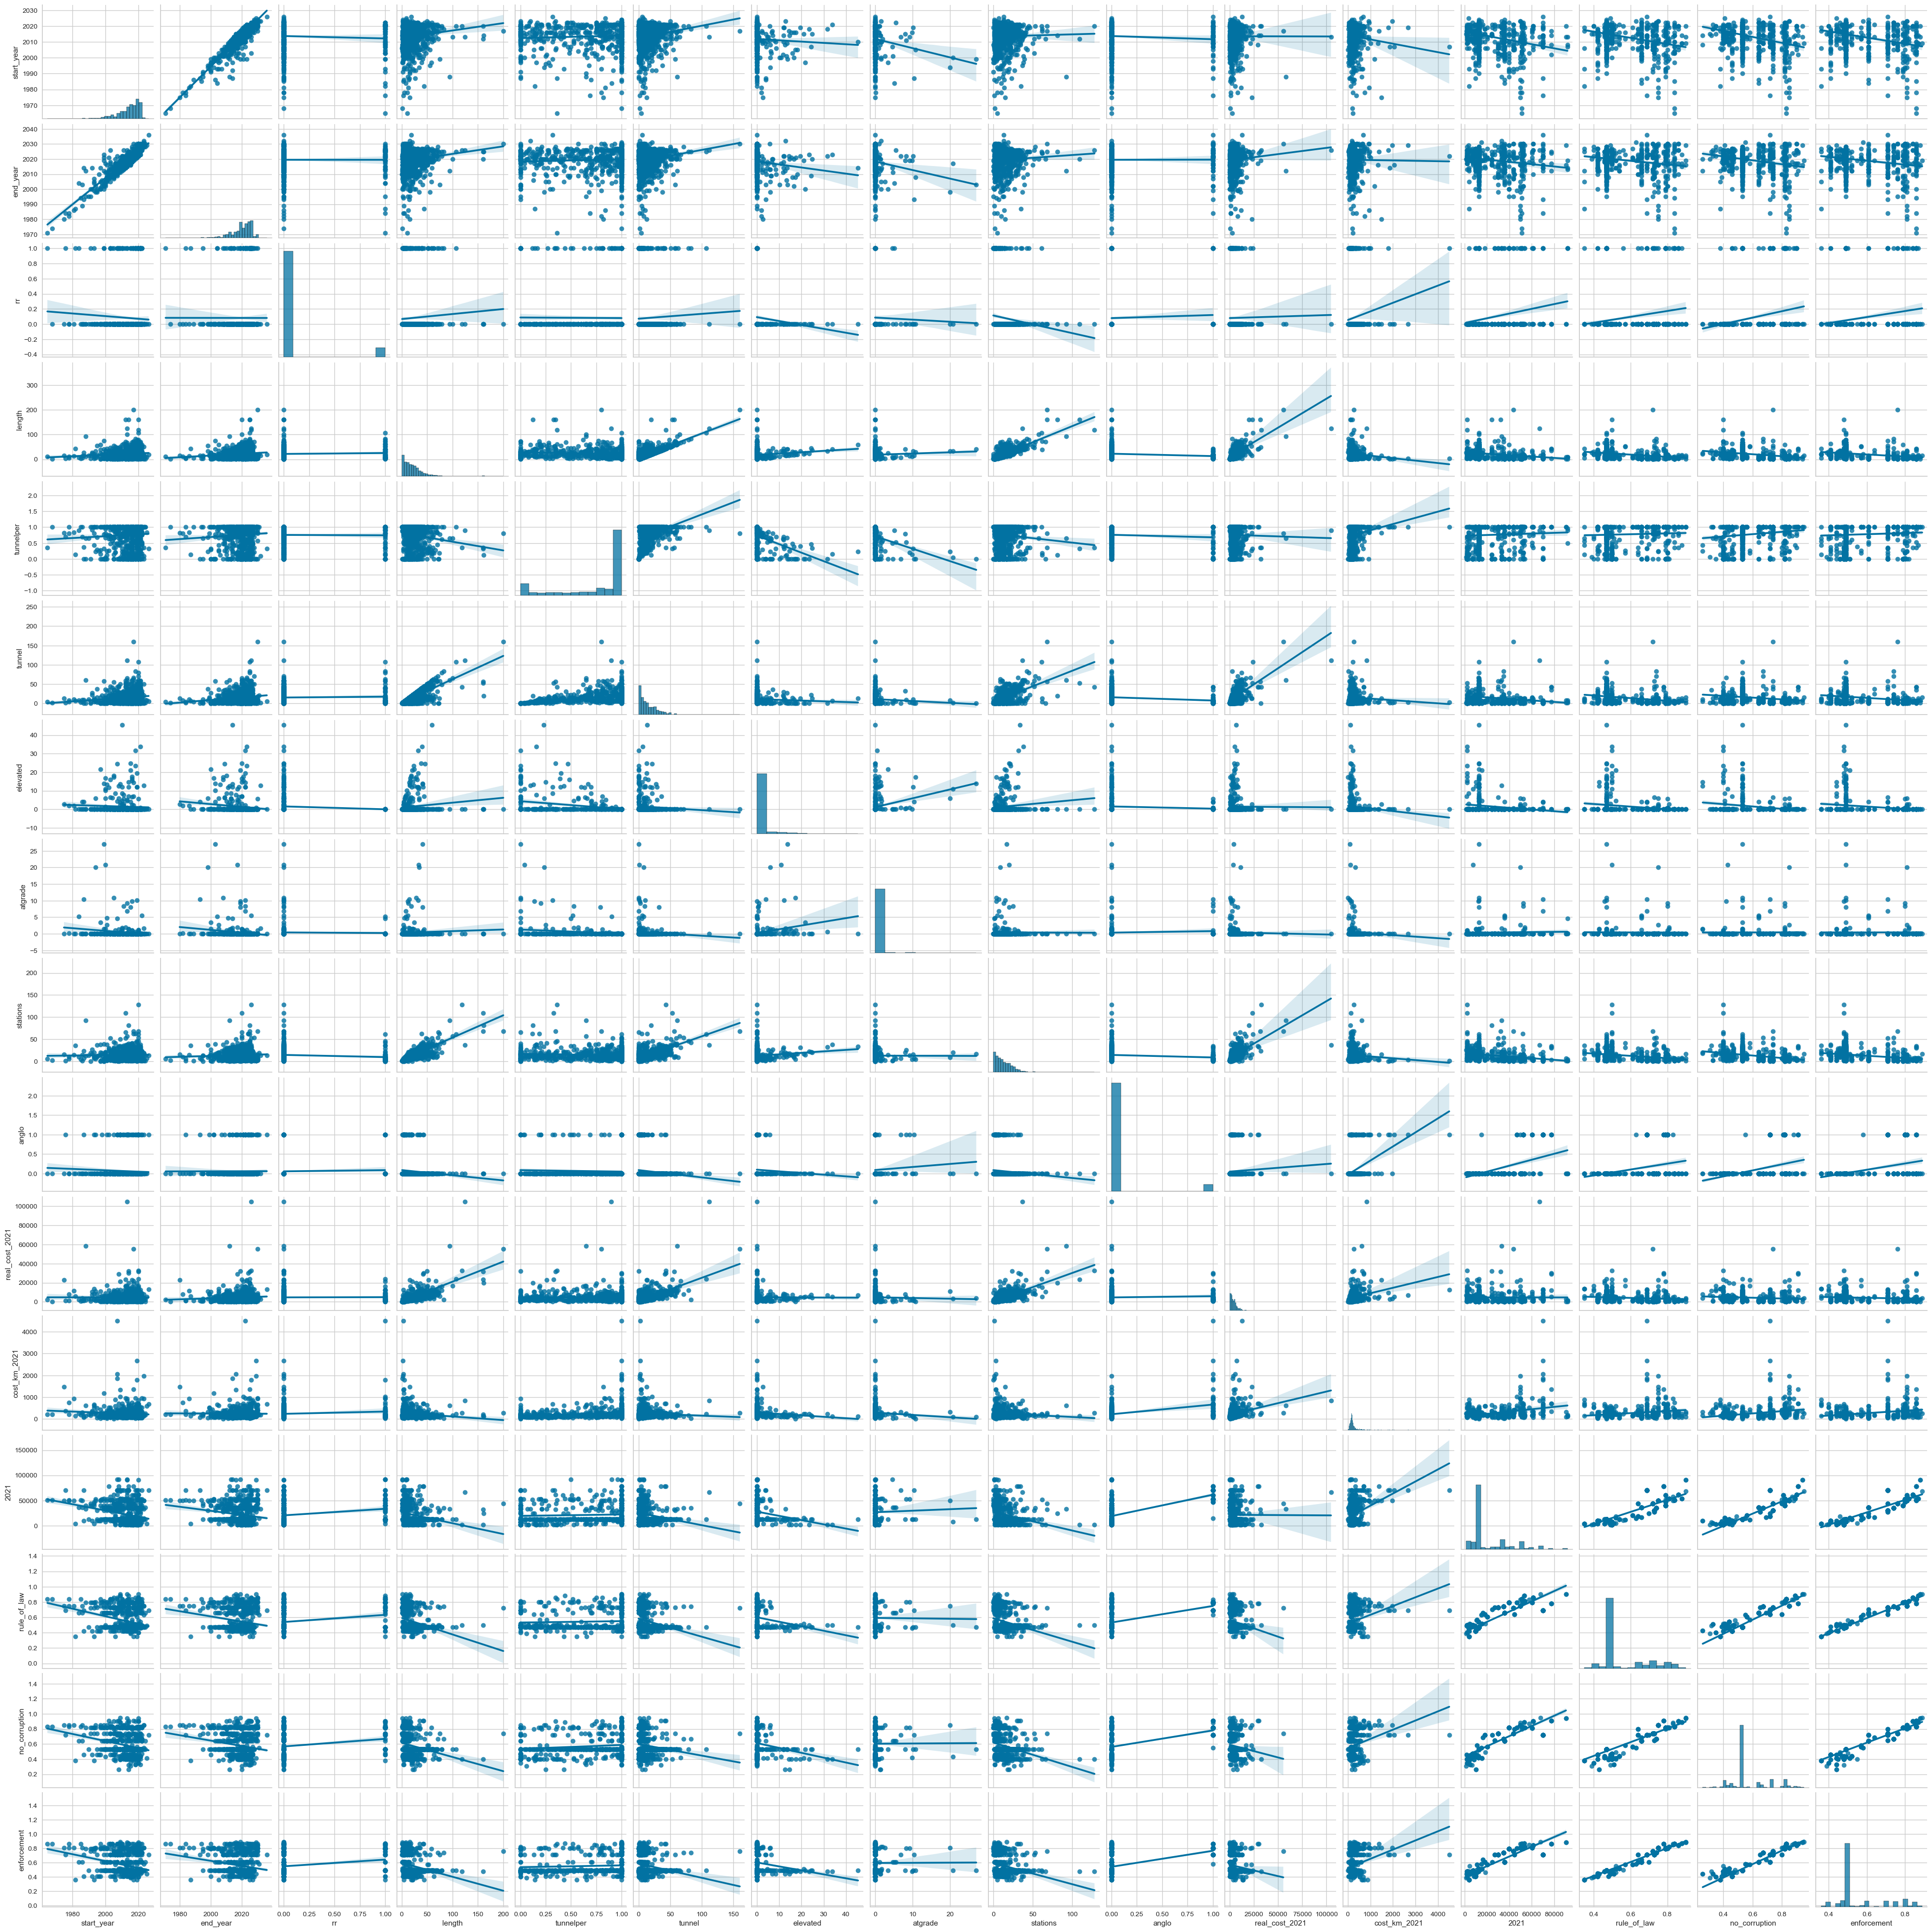

In [102]:
# Pairplots to see how the variables are distributed
cols_to_plot = transit.columns
# kind='reg' adds the line of best fit
ax = sns.pairplot(transit[cols_to_plot], kind='reg')



Lets zero in on some of the variables (numeric) that can go into our cluster model. Some variables still have high degree of correlaiton, we can examine them at a later stage.

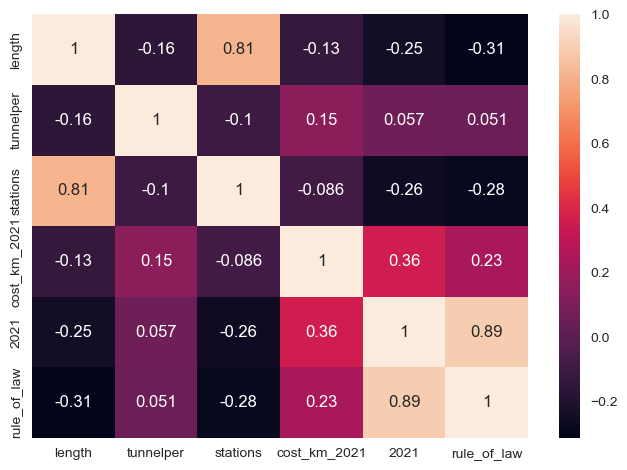

In [192]:
cols = ['length','tunnelper', 'stations', 'cost_km_2021','2021', 'rule_of_law']
# ax = sns.pairplot(transit[cols], kind='reg') 
ax = sns.heatmap(transit[cols].corr(), annot=True)

## Exploring the data

In [112]:
# non-numeric variables
transit[['country','city', 'Region', 'IncomeGroup']].describe()

,country,city,Region,IncomeGroup
count,835,835,835,835
unique,59,184,6,3
top,CN,Shanghai,East Asia & Pacific,Upper middle income
freq,449,33,544,514


In [164]:
data = transit[transit['country']!='CN']
data[['country','city', 'Region', 'IncomeGroup']].describe()

,country,city,Region,IncomeGroup
count,386,386,386,386
unique,58,136,6,3
top,IT,Istanbul,Europe & Central Asia,High income
freq,34,22,174,262


In [131]:
df = transit[['country','city', 'Region', 'IncomeGroup']].describe()
df2= data[['country','city', 'Region', 'IncomeGroup']].describe()
df3 = df.join(df2, lsuffix='_with_China', rsuffix='_with_China')
df3

,country_with_China,city_with_China,Region_with_China,IncomeGroup_with_China,country_with_China,city_with_China,Region_with_China,IncomeGroup_with_China
count,835,835,835,835,386,386,386,386
unique,59,184,6,3,58,136,6,3
top,CN,Shanghai,East Asia & Pacific,Upper middle income,IT,Istanbul,Europe & Central Asia,High income
freq,449,33,544,514,34,22,174,262


China is the biggest urban transit builder, 53% of the total projects. After excluding China, most projects are located in Europe and Central Asia region. 

In [189]:
# numeric variables
transit[cols].describe().round().astype(int)


,length,tunnelper,stations,cost_km_2021,2021,rule_of_law
count,835,835,835,835,835,801
mean,22,1,14,245,21480,1
std,20,0,13,262,17693,0
min,1,0,0,11,1505,0
25%,8,1,5,145,12618,0
50%,18,1,11,189,12618,0
75%,30,1,20,249,33190,1
max,200,1,128,4491,91992,1


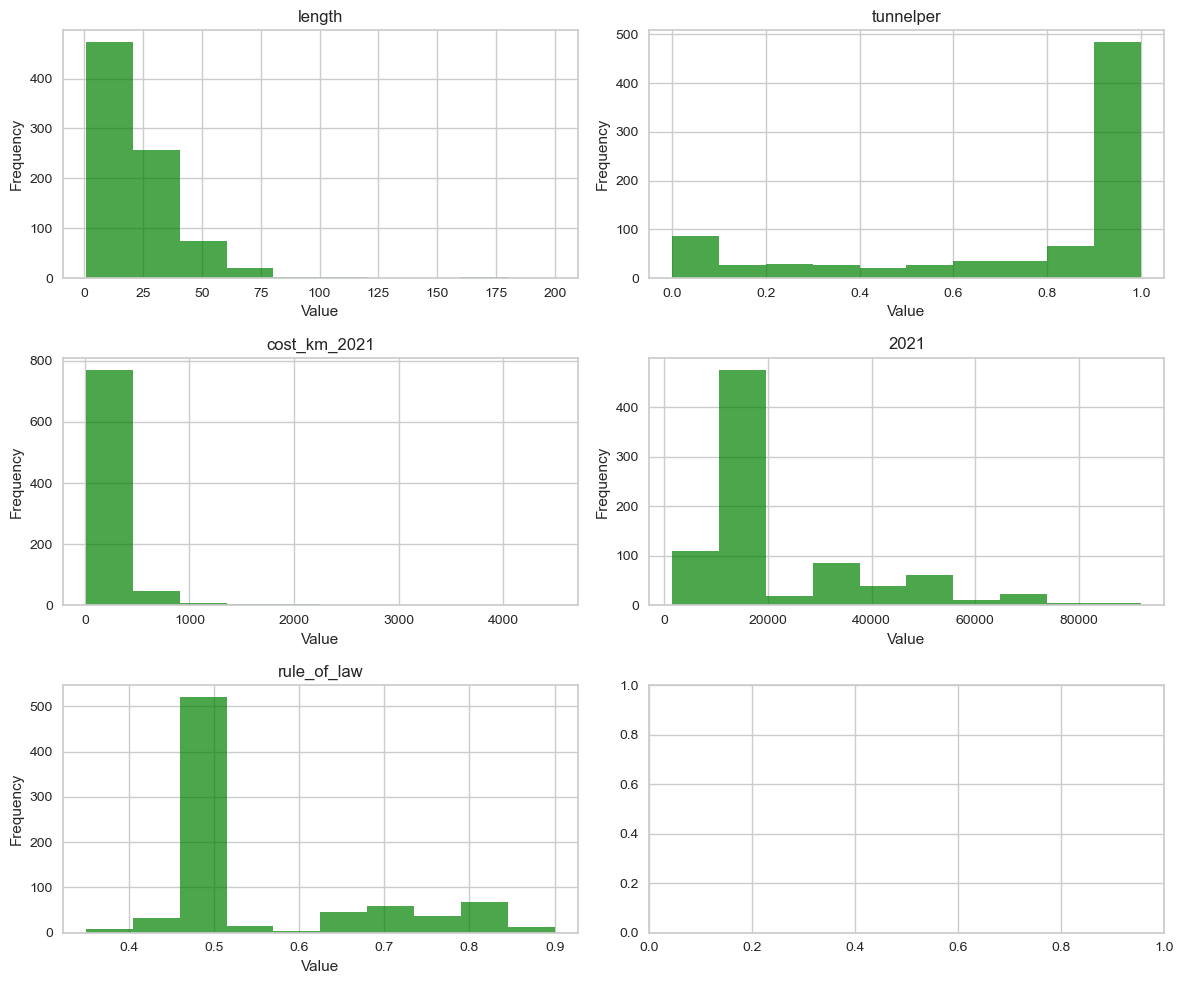

In [202]:
# Ploting histograms for select variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()

cols = ['length', 'tunnelper', 'cost_km_2021', '2021', 'rule_of_law']
for i, col in enumerate(transit[cols]):
    ax = axes[i]
    ax.hist(transit[col], alpha=0.7, color='green')
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Most variables are not distributed evently. They have significant outliers on the higher side. 

## some graphs

In [175]:
import plotly.express as px

In [190]:
transit.groupby('Region')

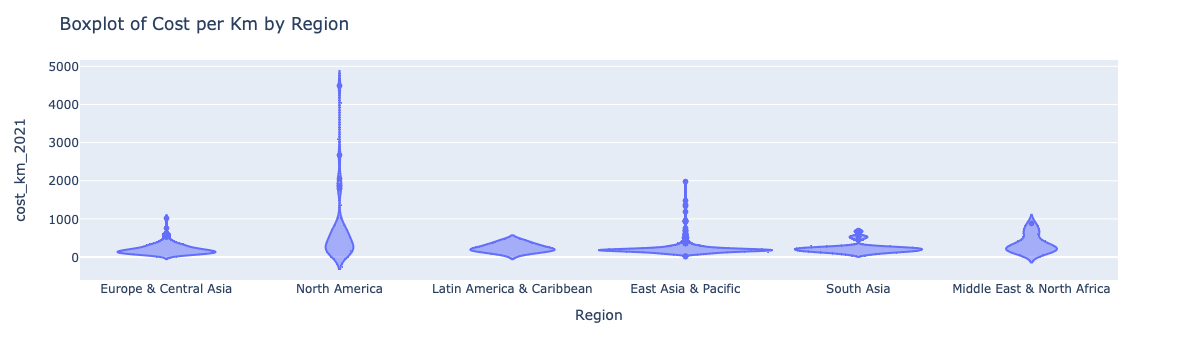

In [195]:


# plt.figure(figsize=(12, 8))
# seaborn.scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)

fig = px.violin(transit, x='Region', y='cost_km_2021')

# plt.xticks(rotation=90)
fig.update_layout(
    title_text="Boxplot of Cost per Km by Region",
    violingap=0, violingroupgap=0, violinmode='overlay')
fig.show()



In [201]:
transit.groupby("Region")[['length', 'cost_km_2021']].mean().astype(int)

,length,cost_km_2021
Region,,
East Asia & Pacific,24,223
Europe & Central Asia,10,209
Latin America & Caribbean,21,241
Middle East & North Africa,43,352
North America,10,675
South Asia,33,228


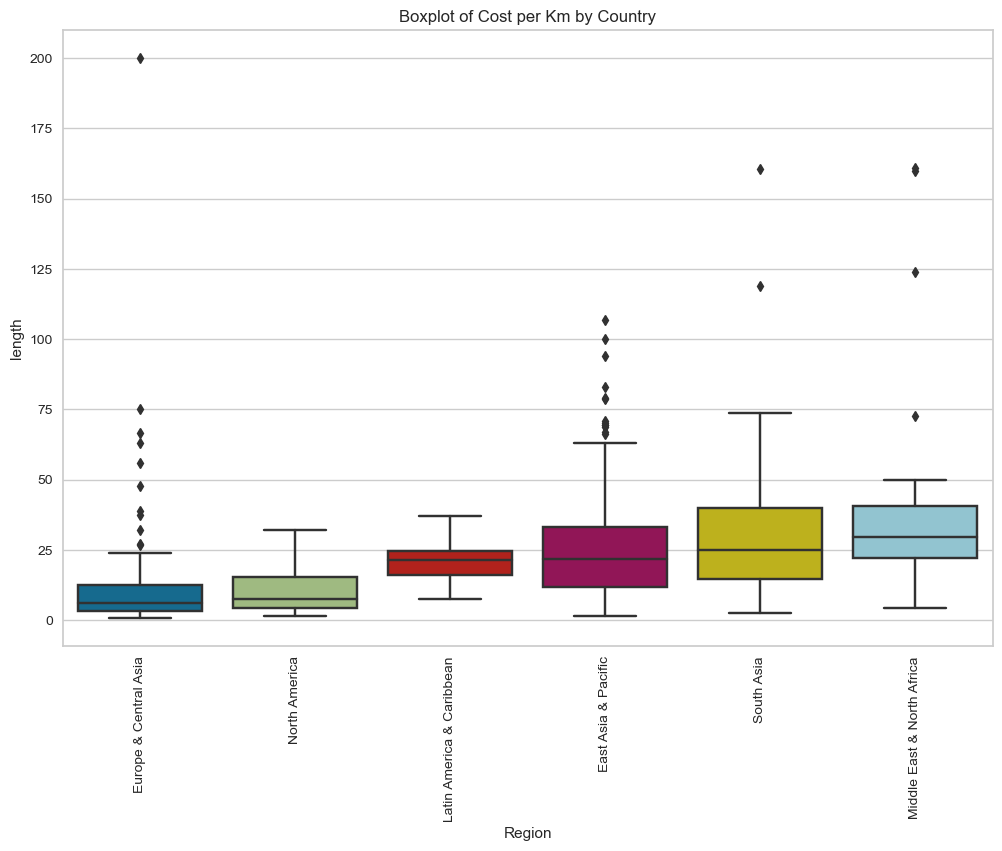

In [197]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='length', data=transit)
plt.xticks(rotation=90)
plt.title('Boxplot of Cost per Km by Country')
plt.show()


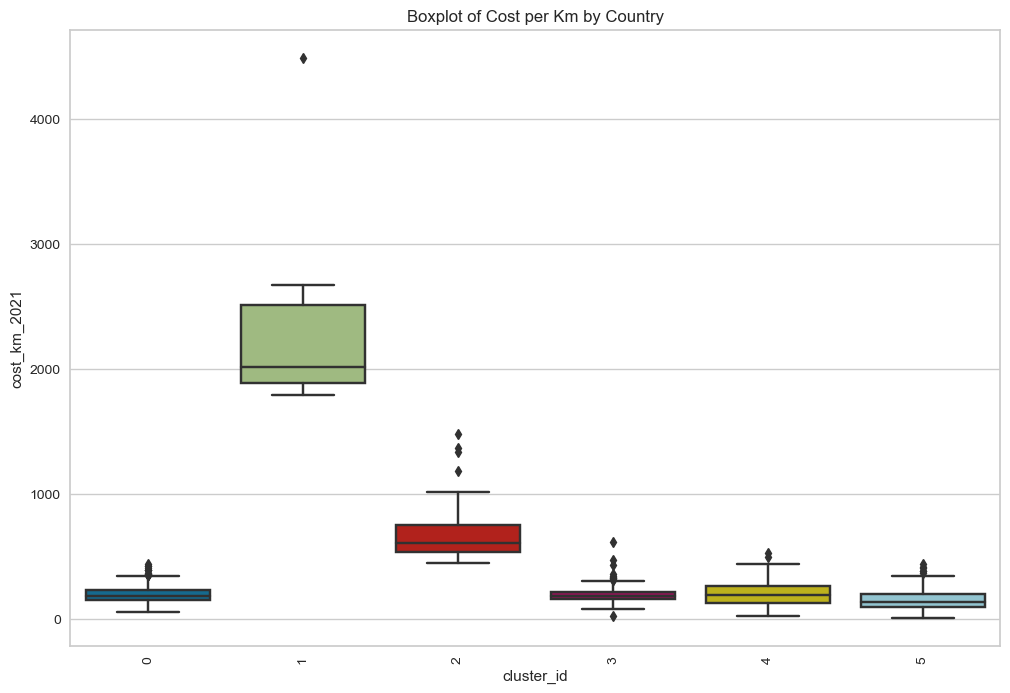

In [57]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster_id', y='cost_km_2021', data=transit_cluster)
plt.xticks(rotation=90)
plt.title('Boxplot of Cost per Km by Country')
plt.show()

transit_cluster.groupby('cluster_id')

<Axes: >

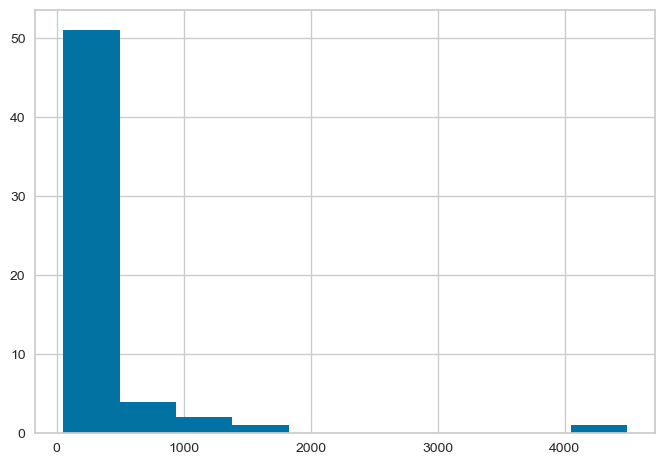

In [24]:
x = transit_cluster[transit_cluster['cluster_id']==0]
x['cost_km_2021'].hist()

/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


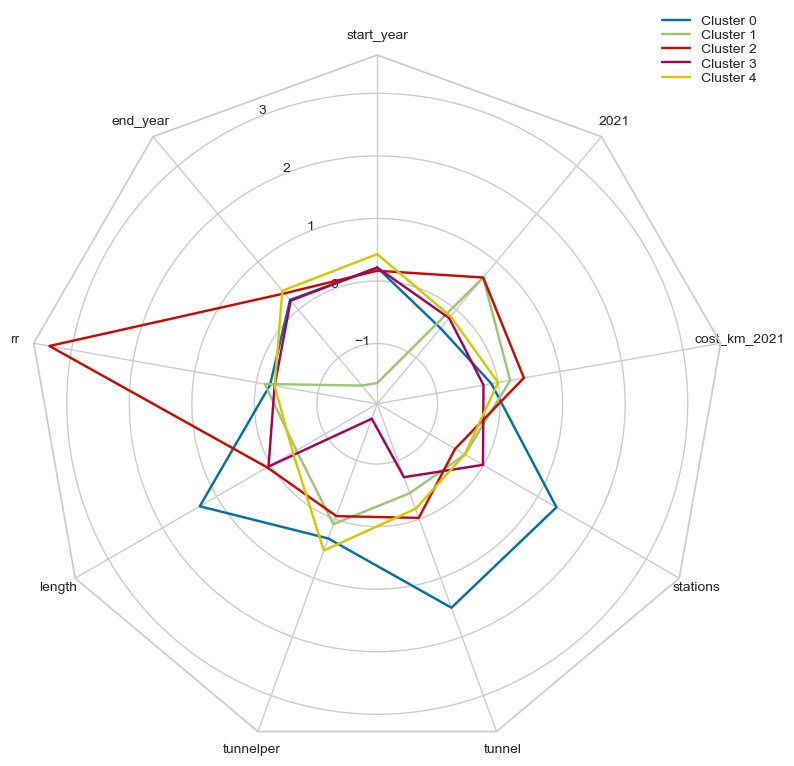

In [203]:
cols_to_plot_2 = ['start_year', 'end_year', 'rr', 'length','tunnelper', 'tunnel', 'stations', 'cost_km_2021', '2021']
data_2 = transit[cols_to_plot_2]

# normalizing
scaler = preprocessing.StandardScaler().fit(data_2)

df_to_cluster_2 = pd.DataFrame(scaler.transform(data_2), 
                         columns=cols_to_plot_2, index=data_2.index) 

# clustering
kmeans_2 = KMeans(n_clusters=5, random_state=0).fit(df_to_cluster_2)

# adding cluster ids to the df
df_to_cluster_2['cluster_id'] = kmeans_2.labels_
radar_plot(kmeans_2, df_to_cluster_2)


In [204]:

df_to_cluster_2.groupby('cluster_id').mean()

,start_year,end_year,rr,length,tunnelper,tunnel,stations,cost_km_2021,2021
cluster_id,,,,,,,,,
0,0.212947,0.204812,-0.224138,1.312519,0.327104,1.505567,1.345113,-0.110237,-0.387464
1,-1.631114,-1.583478,-0.136449,-0.471649,0.083363,-0.442421,-0.343604,0.194222,0.669309
2,0.163637,0.341353,3.358484,0.069045,-0.052513,-0.022322,-0.525305,0.417273,0.672250
3,0.213880,0.189643,-0.297753,0.043364,-1.710054,-0.715222,-0.011429,-0.238511,-0.174504
4,0.430019,0.394747,-0.297753,-0.405881,0.532521,-0.175592,-0.346922,-0.002118,-0.138043


/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


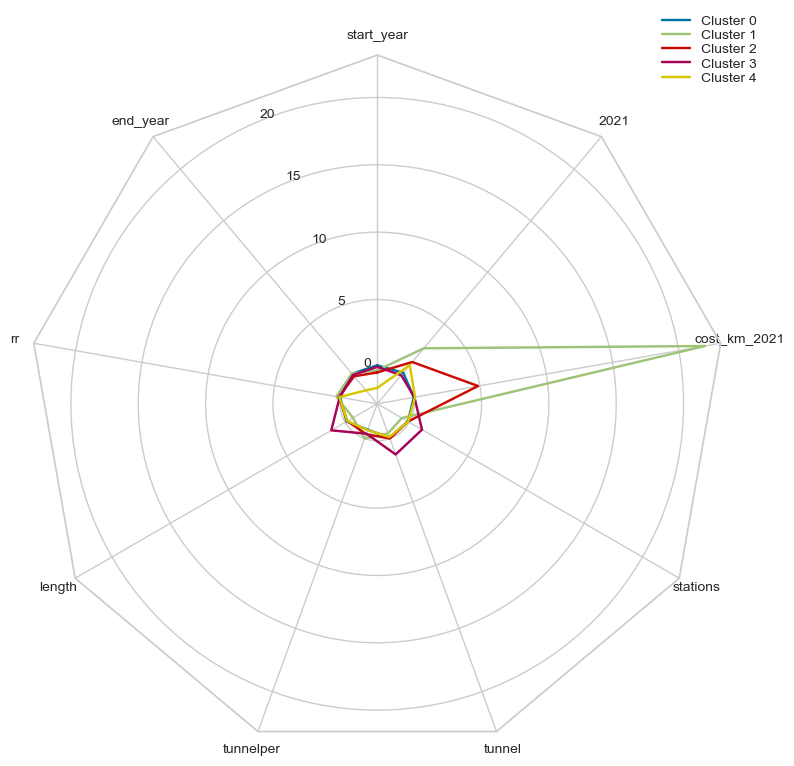

In [205]:
cols_to_plot_2 = ['start_year', 'end_year', 'rr', 'length','tunnelper', 'tunnel', 'stations', 'cost_km_2021', '2021']
data_2 = transit[cols_to_plot_2]

# normalizing
scaler = preprocessing.RobustScaler().fit(data_2)

df_to_cluster_2 = pd.DataFrame(scaler.transform(data_2), 
                         columns=cols_to_plot_2, index=data_2.index) 

# clustering
kmeans_2 = KMeans(n_clusters=5, random_state=0).fit(df_to_cluster_2)

# adding cluster ids to the df
df_to_cluster_2['cluster_id'] = kmeans_2.labels_
radar_plot(kmeans_2, df_to_cluster_2)


In [233]:
transit_cluster = transit.join(df_to_cluster_1['cluster_id'])

In [234]:
x = transit_cluster[transit_cluster['cluster_id']==0]
x['country'].unique()

array(['FI', 'SE', 'DE', 'ES', 'US', 'UK', 'FR', 'NZ', 'JP', 'CH', 'TW',
       'AU', 'AR', 'TR', 'CN', 'BH', 'AT', 'HK', 'PL'], dtype=object)

In [235]:
transit_cluster.groupby('cluster_id').mean()

/var/folders/cx/5hr478816plb9gd8v3v207d40000gn/T/ipykernel_14849/1599416827.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  transit_cluster.groupby('cluster_id').mean()


,start_year,end_year,rr,length,tunnelper,tunnel,elevated,atgrade,stations,anglo,real_cost_2021,cost_km_2021,2021,rule_of_law,no_corruption,enforcement
cluster_id,,,,,,,,,,,,,,,,
0,2014.898305,2022.118644,1.00000,23.389271,0.737676,15.142434,0.009189,0.130054,7.277059,0.084746,4722.991117,354.244026,33367.624127,0.631569,0.671765,0.641176
1,2016.621053,2022.389474,0.00000,9.993905,0.938507,9.143036,0.131381,0.057521,6.774162,0.059649,2247.403182,254.738229,22640.348642,0.559717,0.587668,0.566254
2,2014.583333,2023.916667,0.25000,121.558333,0.680139,75.766514,0.000000,0.000000,70.155476,0.000000,32394.099198,263.844459,26029.923384,0.576250,0.558750,0.583750
3,1999.411765,2006.058824,0.05042,12.847832,0.754044,8.361805,1.626238,0.785510,9.733187,0.100840,3247.512207,289.959479,31944.936180,0.628462,0.656068,0.635043
4,2015.802752,2021.123853,0.00000,35.443847,0.918311,31.783454,1.084280,0.161552,23.666390,0.013761,7407.541287,212.750973,13085.820945,0.479078,0.527005,0.495576
5,2015.309859,2021.049296,0.00000,24.077204,0.156364,4.286082,4.116965,0.850490,14.699866,0.091549,4331.344726,189.272574,17946.469055,0.519360,0.518720,0.523200


In [238]:
transit_cluster.to_csv("Data/transit_cluster.csv")

/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


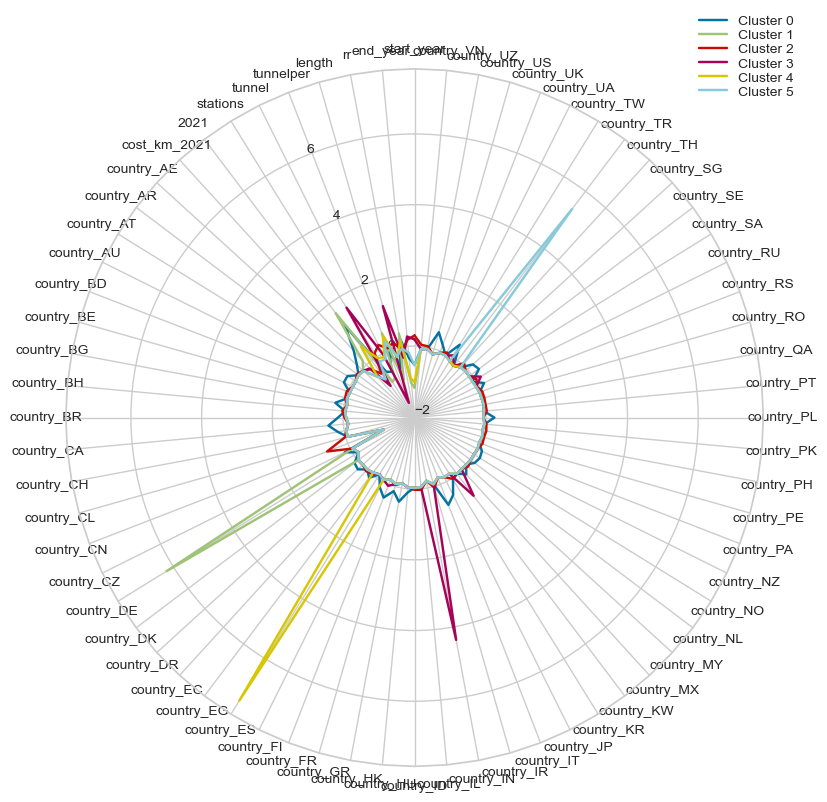

In [244]:
# with categorical values
from sklearn.impute import SimpleImputer

cols_to_plot_3 = ['country', 'start_year', 'end_year', 'rr', 'length','tunnelper', 'tunnel', 'stations', '2021', 'cost_km_2021']
data_3 = transit[cols_to_plot_3]

# Fill missing values with column means

# imputer = SimpleImputer(strategy='mean')

# data_imputed = imputer.fit_transform(data_3)


# dummies for categorical variables
data_3 = pd.get_dummies(data_3)
cols = data_3.columns

# normalizing
scaler = preprocessing.StandardScaler().fit(data_3)

df_to_cluster_3 = pd.DataFrame(scaler.transform(data_3), 
                         columns=cols, index=data_3.index) 

# clustering
kmeans_3 = KMeans(n_clusters=6, random_state=0).fit(df_to_cluster_3)

# adding cluster ids to the df
df_to_cluster_3['cluster_id'] = kmeans_3.labels_
radar_plot(kmeans_3, df_to_cluster_3)


In [246]:
transit_cluster_3 = transit.join(df_to_cluster_3['cluster_id'])
transit_cluster_3.groupby('cluster_id').size()

cluster_id
0    207
1     21
2    527
3     37
4     15
5     28
dtype: int64

In [243]:
transit_cluster_3.groupby('cluster_id').mean()

/var/folders/cx/5hr478816plb9gd8v3v207d40000gn/T/ipykernel_14849/524678910.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  transit_cluster_3.groupby('cluster_id').mean()


,start_year,end_year,rr,length,tunnelper,tunnel,elevated,atgrade,stations,anglo,real_cost_2021,cost_km_2021,2021,rule_of_law,no_corruption,enforcement
cluster_id,,,,,,,,,,,,,,,,
0,2007.798942,2015.407407,0.174603,8.850265,0.781933,5.531614,0.254732,0.471458,6.475184,0.243386,2827.303552,377.384667,48231.081619,0.744032,0.762527,0.746559
1,2015.727273,2021.484848,0.000000,34.555606,0.172303,7.914879,4.728455,0.087258,29.333333,0.000000,6742.835900,195.526204,2238.127139,0.500000,0.400000,0.480000
2,2014.795322,2020.260234,0.046784,14.642015,0.704738,8.582977,1.751677,0.490213,8.968439,0.005848,2859.980150,205.306486,14372.329413,0.491066,0.520125,0.498715
3,2014.000000,2025.000000,0.000000,35.000000,1.000000,35.000000,0.000000,0.000000,35.000000,0.000000,11752.558107,335.787374,6635.463923,0.490000,0.320000,0.480000
4,2018.333333,2025.333333,0.000000,24.033333,0.446667,11.300000,0.000000,0.000000,16.333333,0.000000,13789.425168,581.782118,2457.924049,0.400000,0.350000,0.400000
5,2015.797753,2021.112360,0.071161,39.078051,0.878104,32.321701,2.064412,0.151913,23.459684,0.007491,8000.511148,203.574919,14296.721825,0.480309,0.535444,0.499575


In [294]:
tc = transit_cluster[transit_cluster['transit_cluster']==0]
tc.country.unique()

KeyError: 'transit_cluster'

### K-modes

In [122]:
!pip install kmodes

In [124]:
transit.columns

Index(['country', 'city', 'phase', 'start_year', 'end_year', 'rr', 'length',
       'tunnelper', 'tunnel', 'elevated', 'atgrade', 'stations',
       'platform_length_meters', 'anglo', 'real_cost_2021', 'cost_km_2021',
       'country_name', 'Region', 'IncomeGroup', '2021', 'rule_of_law',
       'no_corruption', 'enforcement'],
      dtype='object')

In [168]:

import numpy as np
from kmodes.kmodes import KModes

# random categorical data
data = transit[['country', 'city', 'start_year', 'end_year', 'rr', 'length',
       'tunnelper', 'tunnel', 'stations', 'Region', 'IncomeGroup', '2021', 'rule_of_law']]
data=data.dropna()
km = KModes(n_clusters=4, init='Huang', n_init=5)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

data['cluster_id']= km.labels_
cl1 = data[data['cluster_id']==0]
cl2 = data[data['cluster_id']==1]
cl3 = data[data['cluster_id']==2]
cl4 = data[data['cluster_id']==3]

[['CN' 'Guangzhou' '2021' '2026' '0.0' '20.0' '1.0' '0.0' '11.0'
  'East Asia & Pacific' 'Upper middle income' '12617.50499' '0.47']
 ['CN' 'Beijing' '2019' '2021' '0.0' '3.5' '1.0' '1.9' '2.0'
  'East Asia & Pacific' 'Upper middle income' '12617.50499' '0.47']
 ['CN' 'Mumbai' '2016' '2020' '0.0' '16.0' '0.0' '0.0' '7.0'
  'East Asia & Pacific' 'Upper middle income' '12617.50499' '0.47']
 ['IT' 'Hong Kong' '2007' '2016' '0.0' '2.5' '1.0' '2.5' '3.0'
  'Europe & Central Asia' 'High income' '35770.04961' '0.66']]


In [167]:

print("Cluster 1", cl1.length.describe())
print("Cluster 2", cl2.length.describe())
print("Cluster 3", cl3.length.describe())
print("Cluster 4", cl4.length.describe())
    
#Region.unique())



Cluster 1 count    358.000000
mean      24.723525
std       19.600599
min        1.300000
25%       10.012500
50%       21.373000
75%       33.500000
max      160.600000
Name: length, dtype: float64
Cluster 2 count    149.000000
mean      24.433866
std       15.597136
min        1.300000
25%       13.828000
50%       20.800000
75%       32.000000
max       72.000000
Name: length, dtype: float64
Cluster 3 count    178.000000
mean       9.675848
std       17.385582
min        0.700000
25%        2.900000
50%        5.050000
75%       11.400000
max      200.000000
Name: length, dtype: float64
Cluster 4 count    116.000000
mean      25.096419
std       14.066017
min        1.830000
25%       15.007500
50%       23.604000
75%       32.370000
max       78.600000
Name: length, dtype: float64
